In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable
import time
from IPython import display 

time_start=time.time()
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(3)+0.05*torch.randn(x.size())
x , y =(Variable(x),Variable(y))
torch.set_num_threads(80)  # 设置pytorch并行线程数

class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.sigmoid(out)
        out =self.predict(out)
        return out

net = Net(1,50,1)
print(net)
learning_rate = 1e-1
optimizer = torch.optim.SGD(net.parameters(),lr = learning_rate)
loss_func = torch.nn.MSELoss()
#plt.ion()
#plt.show()

for t in range(5000):
    prediction = net(x)
    loss = loss_func(prediction,y)    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%200 ==0:
        plt.cla()
        display.clear_output(wait=True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss = %.4f' % loss.data, fontdict={'size': 20, 'color': 'red'})
        plt.text(0.5, 1, 'Count =%.4f' % t,fontdict={'size':15,'color':'green'})
        plt.pause(0.0005)
        
#plt.ioff()
#plt.show()
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(x.size(),y.size())
print(torch.get_num_threads())

Net(
  (hidden1): Linear(in_features=1, out_features=50, bias=True)
  (hidden2): Linear(in_features=50, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=1, bias=True)
)


In [1]:
x2 = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)

NameError: name 'torch' is not defined

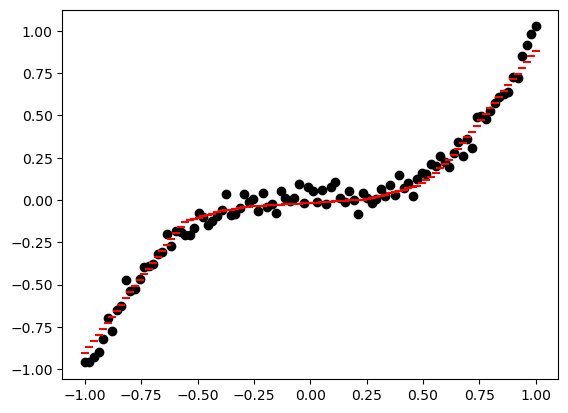

In [4]:
y_preds=net(x2)
y2 = x.pow(3) +0.05*torch.randn(x.size())
x2,y_preds = (Variable(x2),Variable(y_preds))
plt.scatter(x2,y2,c='black')
plt.scatter(x2.data,y_preds.data,c='red',marker='_')
plt.show()


In [22]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())


hidden1.weight : torch.Size([20, 1])
hidden1.bias : torch.Size([20])
hidden2.weight : torch.Size([20, 20])
hidden2.bias : torch.Size([20])
predict.weight : torch.Size([1, 20])
predict.bias : torch.Size([1])


In [23]:
for parameters in net.parameters():
    print(parameters)

Parameter containing:
tensor([[-0.2449],
        [ 0.0048],
        [-1.2601],
        [-0.1447],
        [-1.0599],
        [-1.0232],
        [ 0.4799],
        [ 0.0858],
        [-0.5491],
        [-0.9315],
        [ 1.4603],
        [ 0.3572],
        [-0.9613],
        [-0.4896],
        [ 0.7187],
        [-0.7915],
        [-1.2055],
        [ 0.7684],
        [ 0.0212],
        [ 0.5377]], requires_grad=True)
Parameter containing:
tensor([-0.8376,  0.4444, -0.8066,  0.6530,  0.4543,  0.6924, -0.5906, -0.8812,
         0.5702, -0.4986, -0.9776, -0.4023,  0.9653,  0.4917, -0.7840,  0.3221,
        -0.6454,  0.7684, -0.0941,  0.8099], requires_grad=True)
Parameter containing:
tensor([[ 1.6445e-01,  3.9717e-02,  4.2697e-01,  1.7520e-02, -2.5645e-01,
         -3.0138e-01, -1.4959e-01,  1.4721e-01,  1.2217e-01,  2.3673e-01,
         -3.8864e-01, -3.5185e-02,  2.4372e-01,  2.9086e-01, -3.6456e-02,
         -9.5172e-02,  4.2778e-01, -1.4196e-01,  1.6726e-01, -7.1351e-02],
        [ 1

In [27]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=0)
x

tensor([[-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
         -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
         -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
         -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
         -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
         -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
         -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
          0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
          0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
          0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
          0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
          0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
          0.9394,  0.9596,  